<a href="https://colab.research.google.com/github/juh5ng/juh5ng.github.io/blob/master/The_Red_Dynamic_Pricing_Part3_(%EA%B3%B5%EC%9C%A0%EC%9E%90%EB%A3%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The Red: 비즈니스의 운명을 바꾸는 Dynamic Pricing
##Part3.  시뮬레이션 기반 실습 - 다양한 수요곡선과 최적의 가격 찾기


# 실습환경과 목표 (계속)
실습을 시작하기 전에, 기초적인 몸풀기를 시작해보겠습니다.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# 간단한 numpy array 생성 
price_points = np.arange(start=10, stop=101, step=10)
price_points

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [ ]:
# 간단한 랜덤 array 생성
random_points = np.random.rand(10)
random_points

array([0.89291797, 0.12366621, 0.8237734 , 0.56419734, 0.87006477,
       0.22391869, 0.69456974, 0.10641927, 0.35153742, 0.54662091])

In [ ]:
# Pandas Dataframe 생성
df = pd.DataFrame({
  'price': price_points,
  'random': random_points
})
df

,price,random
0,10,0.892918
1,20,0.123666
2,30,0.823773
3,40,0.564197
4,50,0.870065
5,60,0.223919
6,70,0.694570
7,80,0.106419
8,90,0.351537
9,100,0.546621


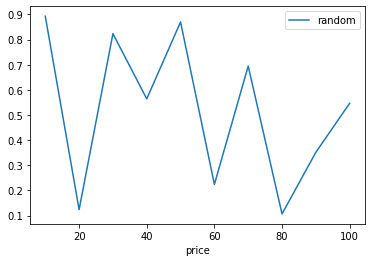

In [ ]:
# Pandas 에 내장된 Matplotlib을 이용 
df.plot(x='price', y='random')

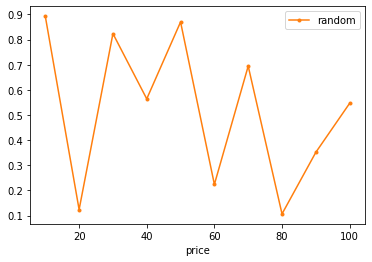

In [ ]:
# 옵션 추가
df.plot(x='price', y='random', color='tab:orange', marker='.')

In [ ]:
# Python 함수 작성 - 간단한 선형 수요함수를 작성
def demand(p):
  theta0 = 100
  theta1 = -1
  return theta0 + theta1 * p

print(demand(10))
print(demand(20))

90
80


In [ ]:
# numpy array 의 기능을 활용
demand_points = demand(price_points)
demand_points

array([90, 80, 70, 60, 50, 40, 30, 20, 10,  0])

In [ ]:
df = pd.DataFrame({
  'price': price_points,
  'demand': demand_points,
})
df

,price,demand
0,10,90
1,20,80
2,30,70
3,40,60
4,50,50
5,60,40
6,70,30
7,80,20
8,90,10
9,100,0


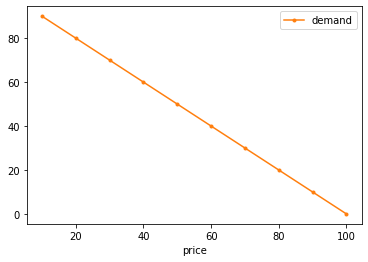

In [ ]:
df.plot(x='price', y='demand', color='tab:orange', marker='.')

따라하다보니, 기초적인 가격-수요 곡선을 그려보았습니다.  

# 가격-수요 곡선


본격적으로 시작해보겠습니다.
좀 더 복잡한 가격-수요 곡선을 그려보고, 최적 가격을 눈으로 확인해보고, 다음으로는 최적 가격을 수식으로 계산해보겠습니다. 

In [ ]:
# 선형 가격-수요 곡선 
def demand_linear(p):
  theta0 = 100
  theta1 = -1
  return theta0 + theta1 * p

# 지수 가격-수요 곡선 
def demand_exponential(p):
  theta0 = 2500
  theta1 = -1
  return theta0 / (p ** -theta1)

# 복합적인 가격-수요 곡선
def demand_complex(p_array):
  demand_array = np.array([])
  for p in p_array:
    if p < 60:
      theta0 = 200
      theta1 = -1
    else:
      theta0 = 200
      theta1 = -2
      
    demand_array = np.append(demand_array, theta0 + theta1 * p)
  return demand_array


In [ ]:
df_linear = pd.DataFrame({
  'price': price_points,
  'demand': demand_linear(price_points),
})
df_linear

,price,demand
0,10,90
1,20,80
2,30,70
3,40,60
4,50,50
5,60,40
6,70,30
7,80,20
8,90,10
9,100,0


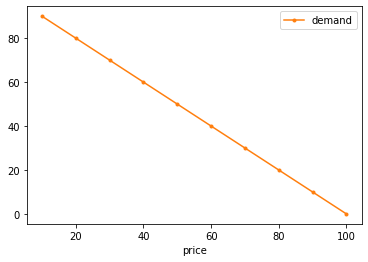

In [ ]:
df.plot(x='price', y='demand', color='tab:orange', marker='.')

In [ ]:
# 매출과 손익 같이 구하고 그리기

df_linear = pd.DataFrame({
  'price': price_points,
  'demand': demand_linear(price_points),
})
df_linear

,price,demand
0,10,90
1,20,80
2,30,70
3,40,60
4,50,50
5,60,40
6,70,30
7,80,20
8,90,10
9,100,0


In [ ]:
df_linear['revenue'] = df_linear['demand'] * df_linear['price']

unit_cost = 30

df_linear['cost'] = unit_cost * df_linear['demand']

df_linear['profit'] = df_linear['revenue'] - df_linear['cost']

df_linear

,price,demand,revenue,cost,profit
0,10,90,900,2700,-1800
1,20,80,1600,2400,-800
2,30,70,2100,2100,0
3,40,60,2400,1800,600
4,50,50,2500,1500,1000
5,60,40,2400,1200,1200
6,70,30,2100,900,1200
7,80,20,1600,600,1000
8,90,10,900,300,600
9,100,0,0,0,0


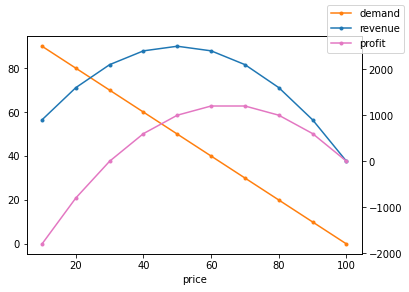

In [ ]:
# 재사용을 위해 차팅 함수를 만들자
def draw(df):
  ax = df.plot(x='price', y='demand', legend=False, color='tab:orange', marker='.', )
  ax2 = ax.twinx()
  df.plot(x='price', y='revenue', ax=ax2, legend=False, color='tab:blue', marker='.')
  df.plot(x='price', y='profit', ax=ax2, legend=False, color='tab:pink', marker='.')
  ax.figure.legend()

draw(df_linear)

* 왼쪽축은 가격-수요 
* 오른쪽축은 매출, 손익

* 원가가 30원이므로 30원 미만은 손해보는 가격

* 매출이 최대가 되는 가격은? => 50원
 * 매출은 역포물선을 그리므로 40원, 60원도 매출이 나쁘지 않음 (수요는 급등락하는것 같아 보이더라도 매출 차이는 크지 않음)
* 손익이 최대가 되는 가격은 60~70원. 매출이 최대가 되는 지점보다 높다. 
 * 손익이 최대가 되는 가격은 매출이 최대가 되는 가격보다 항상 높다. 
 * 즉 손익을 생각하면 가격을 올려야하고, 매출을 생각하면 가격을 낮춰야하는 경우가 많을 것이다. 
 

   price      demand  revenue         cost       profit
0     10  250.000000   2500.0  7500.000000 -5000.000000
1     20  125.000000   2500.0  3750.000000 -1250.000000
2     30   83.333333   2500.0  2500.000000     0.000000
3     40   62.500000   2500.0  1875.000000   625.000000
4     50   50.000000   2500.0  1500.000000  1000.000000
5     60   41.666667   2500.0  1250.000000  1250.000000
6     70   35.714286   2500.0  1071.428571  1428.571429
7     80   31.250000   2500.0   937.500000  1562.500000
8     90   27.777778   2500.0   833.333333  1666.666667
9    100   25.000000   2500.0   750.000000  1750.000000


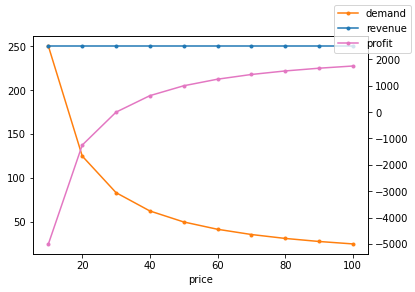

In [ ]:
# 나머지 다양한 수요곡선도 그려보자

# 지수 가격-수요 곡선 
df_exponential = pd.DataFrame({
  'price': price_points,
  'demand': demand_exponential(price_points),
})
df_exponential['revenue'] = df_exponential['demand'] * df_exponential['price']
df_exponential['cost'] = unit_cost * df_exponential['demand']
df_exponential['profit'] = df_exponential['revenue'] - df_exponential['cost']

print(df_exponential)
draw(df_exponential)

* 왼쪽축은 가격-수요 
* 오른쪽축은 매출, 손익

* 수요가 가격의 반비례 형태로 움직이는 모델로, 가격이 변해도 매출이 유지되는 모델 
 * (모든 구간에서 가격탄력성이 1 = 단위탄력성) 

* 매출이 항상 같으므로 가격이 높을수록 손익이 좋다  

   price  demand  revenue    cost  profit
0     10   190.0   1900.0  5700.0 -3800.0
1     20   180.0   3600.0  5400.0 -1800.0
2     30   170.0   5100.0  5100.0     0.0
3     40   160.0   6400.0  4800.0  1600.0
4     50   150.0   7500.0  4500.0  3000.0
5     60    80.0   4800.0  2400.0  2400.0
6     70    60.0   4200.0  1800.0  2400.0
7     80    40.0   3200.0  1200.0  2000.0
8     90    20.0   1800.0   600.0  1200.0
9    100     0.0      0.0     0.0     0.0


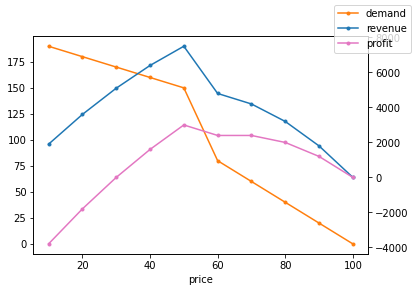

In [ ]:
# 지수 가격-수요 곡선 
df_complex = pd.DataFrame({
  'price': price_points,
  'demand': demand_complex(price_points),
})
df_complex['revenue'] = df_complex['demand'] * df_complex['price']
df_complex['cost'] = unit_cost * df_complex['demand']
df_complex['profit'] = df_complex['revenue'] - df_complex['cost']

print(df_complex)
draw(df_complex)

* 급격하게 수요가 떨어지는 모델
 * 경쟁이 심한 경우
* 특정 가격 이상 올라가는 경우 매출도 급락하므로, 손익도 급락함
* 경쟁으로 인한 가격의 데드라인이 있다면 주의해야 함

# 최적의 가격 찾기
이제, 최적 가격에 대해 알아보겠습니다.

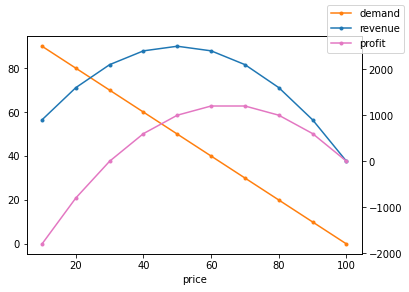

In [ ]:
draw(df_linear)

선형 가격곡선에서 살펴보았듯, 매출 혹은 손익이 최고가 되는 가격점이 있습니다.
그래프로 살펴보지 않고도, 이를 이론으로도 알수있습니다. 

$d$ : demand function

$r$ : revenue function

$d(p) = \theta_0 + \theta_1 p$

$r(p) = d(p) * p = \theta_0p + \theta_1 p^2$

$ p_{opt} = arg \underset{p}{\operatorname{max}} r(p)$

find $p_{opt}$ for $ \frac{\mathrm{d} r(p_{opt})} {\mathrm{d} p} = 0$

$  \theta_0 + 2\theta_1 p_{opt} = 0 $ 

$p_{opt} = - \frac {\theta_0} {2\theta_1} $

In [ ]:
# 선형 가격-수요 곡선 
def demand_linear(p):
  theta0 = 100
  theta1 = -1
  return theta0 + theta1 * p

theta0 = 100
theta1 = -1

optimal_p_for_revenue = -1/2 * theta0 / theta1
print(optimal_p_for_revenue)

50.0


손익을 위한 최적의 가격도 계산해봅시다. 

$pl$ : profit/loss function

$c$ : unit cost

$pl(p) = r(p) - d(p) * c = \theta_0 p + \theta_1 p^2 - (\theta_0 + \theta_1 p) c$ 

$ =  -\theta_0c +\theta_0p - \theta_1 c p + \theta_1 p^2 $

find $p_{opt}$ for $ \frac{\mathrm{d} pl(p_{opt})} {\mathrm{d} p} = 0$

$  \theta_0 - \theta_1c + 2\theta_1 p_{opt} = 0 $ 

$p_{opt} = - \frac {\theta_0} {2\theta_1}  + \frac {c} {2}  = p_{opt_r} + \frac {c} {2} $

매출을 위한 최적의 가격에서 원가/2 를 더한 가격!

In [ ]:
optimal_p_for_profit = -1/2 * (theta0 - theta1 * unit_cost) / theta1
print(optimal_p_for_profit)

65.0


 # 연습
 ### 종합적인 목표
 매출과 손익, 판매량(수요)을 1:1:1로 혼합한 목표일 때 최적 가격을 찾아보세요
 기준을 어떻게 세워서 목표를 혼합야할까요?

# 가격탄력성 파악 실험

지금까지는 수요곡선을 알고있다는 가정 하에 여러 계산을 해보았는데, 실제로는 수요곡선을 알 수 없는 경우가 대부분입니다. 

수요곡선은 결국 실험과 관측을 통해 파악해야 합니다.

다양한 지점의 가격을 전개하고 해당 가격에서의 수요(판매량)을 수집합니다.

In [ ]:
#	실습목표: 처음에 가정한 d(p)를 모를때, 관측을 통해 측정해보자 

np.random.seed(200)

unknown_theta0 = 100
unknown_theta1 = -1

# 관측치
def sample_actual_demand(p): 
    demand = unknown_theta0 + unknown_theta1 * p    
    return np.random.poisson(demand)

unit_cost = 30

price_points = np.arange(start=30, stop=71, step=5)
price_points = np.repeat(price_points, 5)
demand_points = np.array([sample_actual_demand(p) for p in price_points])

df_ped = pd.DataFrame({
  'price': price_points,
  'demand': demand_points,
})
df_ped['revenue'] = df_ped['demand'] * df_ped['price']
df_ped['cost'] = unit_cost * df_ped['demand']
df_ped['profit'] = df_ped['revenue'] - df_ped['cost']
df_ped

,price,demand,revenue,cost,profit
0,30,88,2640,2640,0
1,30,72,2160,2160,0
2,30,77,2310,2310,0
3,30,66,1980,1980,0
4,30,69,2070,2070,0
5,35,79,2765,2370,395
6,35,74,2590,2220,370
7,35,72,2520,2160,360
8,35,74,2590,2220,370
9,35,76,2660,2280,380


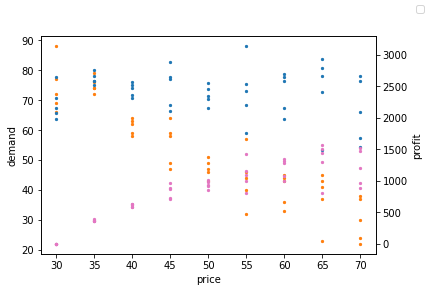

In [ ]:
ax = df_ped.plot.scatter(x='price', y='demand', legend=False, color='tab:orange', marker='.', )
ax2 = ax.twinx()
df_ped.plot.scatter(x='price', y='revenue', ax=ax2, legend=False, color='tab:blue', marker='.')
df_ped.plot.scatter(x='price', y='profit', ax=ax2, legend=False, color='tab:pink', marker='.')
ax.figure.legend()


In [ ]:
# 관측치로부터 수요곡선(theta) 를 추정하는데는 여러 방법이 있을 수 있다. 
# 간편한 statsmodels 라이브러리의 회귀모형을 써보도록 하자.

# https://www.statsmodels.org/stable/index.html
# https://www.statsmodels.org/stable/regression.html

import statsmodels.formula.api as sm

# Linear Regression (OLS - Ordinary Least Square)
result = sm.ols(formula='demand ~ price', data=df_ped).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     211.8
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           3.21e-18
Time:                        09:16:26   Log-Likelihood:                -148.98
No. Observations:                  45   AIC:                             302.0
Df Residuals:                      43   BIC:                             305.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.6889      4.045     26.871      0.0

In [ ]:
theta0 = result.params[0]
theta1 = result.params[1]

print('theta0 : ', theta0)
print('theta1 : ', theta1)

optimal_p_for_revenue = -1/2 * theta0 / theta1
print(optimal_p_for_revenue)

optimal_p_for_profit = -1/2 * (theta0 - theta1 * unit_cost) / theta1
print(optimal_p_for_profit)


theta0 :  108.68888888888894
theta1 :  -1.1399999999999997
47.67056530214428
62.670565302144276


In [ ]:
# 예측문제를 해결하는데엔 머신러닝이 잘 어울린다 
# 가장 대중적인 scikit-learn 을 사용해보자 

# https://scikit-learn.org/stable/
# 여기서는 해석가능성에 중점을 두고 있기 때문에 Linear Regression을 사용 
# 예측성능이 더 중요한 경우는 다양한 피쳐를 활용해 트리 앙상블 모델 같은것들을 사용해보는것도 좋다

from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = df_ped['price'].values.reshape(-1, 1)
y = df_ped['demand'].values.reshape(-1, 1)
model.fit(x, y)
print(model.coef_)
print(model.intercept_)

r_sq = model.score(x, y)
print(r_sq)


[[-1.14]]
[108.68888889]
0.8312549511611776


## 연습

만약 관측값이 더 넓게 분포되어있다면 추정치를 믿을 수 있을까?
그런 상황에서는 어떻게 해야할까?

## 정리
첫번째 실습은 몸풀기로 기본적인 형태의 실습을 진행해보았습니다. 다음번에는 실전 상황에서 마주칠 수 있는 복잡한 상황을 재현시켜보며 실습이 진행됩니다.